<a href="https://colab.research.google.com/github/victen18/Multivariate-Time-Series-Modeling-using-FaceBook-Prophet/blob/main/Multivariate_Time_Series_Modeling_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install download
!pip install fbprophet

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from datetime import datetime 
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

from download import download

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [4]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [5]:
df.shape

(49205, 4)

In [6]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [8]:
fig = px.line(df,x='timeStamp',y='demand',hover_data=['temp'],title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1,label="1y",step="year",stepmode="backward"),
                      dict(count=2,label="3y",step="year",stepmode="backward"),
                      dict(count=3,label="5y",step="year",stepmode="backward"),
                      dict(step="all")
        ])
    )
)
fig.show()

In [9]:
ny_df=df.set_index('timeStamp')

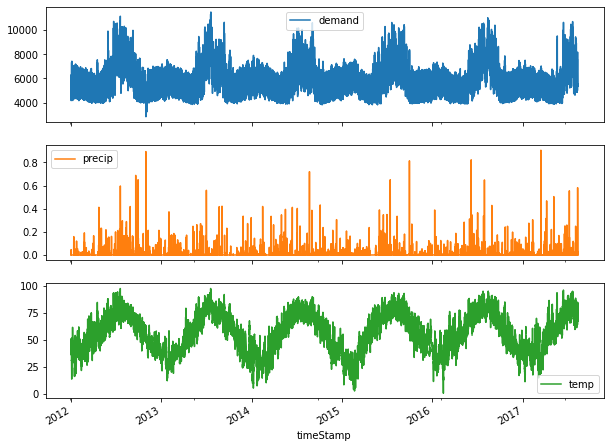

In [10]:
ny_df.plot(subplots=True)
plt.show()

In [11]:
ny_df.resample("D").mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


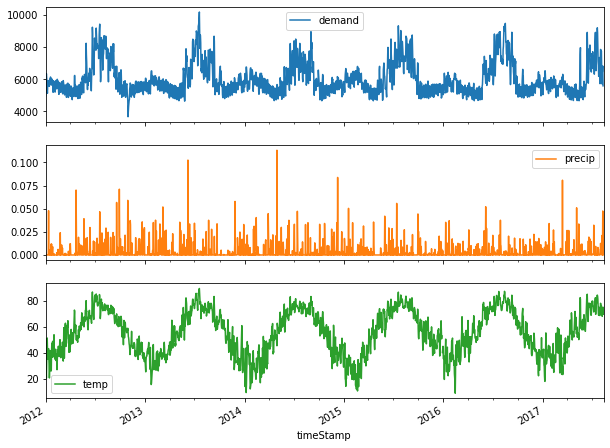

In [12]:
ny_df.resample("D").mean().plot(subplots=True)
plt.show()

In [13]:
ny_df_daily = ny_df.resample('D').mean()

In [14]:
ny_df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [15]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'},axis='columns')

In [16]:
ny_df_final

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
2046,2017-08-08,6471.626042,71.039167
2047,2017-08-09,6811.112167,73.852500
2048,2017-08-10,5582.297000,75.217500
2049,2017-08-11,NaN,72.767917


In [17]:
ny_df_final.query('temp != temp')

,ds,y,temp
1457,2015-12-28,5510.776333,NaN


In [18]:
ny_df_final['temp'] = ny_df_final['temp'].fillna(method='ffill')

In [19]:
ny_df_final['month'] = ny_df_final['ds'].dt.month

In [20]:
ny_df_final.head()

,ds,y,temp,month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1
2,2012-01-03,6095.512500,26.672500,1
3,2012-01-04,6336.266667,20.585000,1
4,2012-01-05,6130.245833,33.577500,1


In [21]:
fig = px.line(ny_df_final,x='ds',y='y',hover_data=['temp','month'],title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1,label='1y',step="year",stepmode="backward"),
                      dict(count=2,label='3y',step="year",stepmode="backward"),
                      dict(count=3,label='5y',step="year",stepmode="backward"),
                      dict(step='all')
        ])
    )
)
fig.show()

In [22]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
             min       mean        max
month                                 
1       9.507917  33.432140  55.420455
2       9.015000  34.517758  59.360000
3      20.291667  41.419884  67.878333
4      33.045833  52.600204  72.992083
5      48.090833  62.543994  82.576250
6      52.405833  71.334418  86.916667
7      66.417083  77.595627  89.606667
8      68.042083  75.525947  87.426250
9      57.274583  69.550306  84.448750
10     42.106250  58.642895  74.277500
11     27.172500  47.225638  67.606250
12     22.429583  41.520068  64.735000

In [23]:
ny_df_final[['y','temp']].corr()

,y,temp
y,1.000000,0.560888
temp,0.560888,1.000000


In [24]:
ny_df_final.query('temp>80')[['y','temp']].corr()

,y,temp
y,1.000000,0.552918
temp,0.552918,1.000000


In [25]:
ny_df_final.query('temp <= 80')[['y','temp']].corr()

,y,temp
y,1.000000,0.470562
temp,0.470562,1.000000


In [26]:
def summer_temp(temp):
  if temp>80:
    return 1
  else:
    return 0

In [27]:
ny_df_final['summer_temp'] = ny_df_final['temp'].apply(summer_temp)

In [28]:
ny_df_final['month_bins'] = pd.cut(ny_df_final['month'],bins=3,labels=False)

In [29]:
ny_df_final

,ds,y,temp,month,summer_temp,month_bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0
3,2012-01-04,6336.266667,20.585000,1,0,0
4,2012-01-05,6130.245833,33.577500,1,0,0
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


In [30]:
train = ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test = ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [31]:
train.shape,test.shape

((1947, 6), (104, 6))

In [32]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [33]:
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [34]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
m.params

{'beta': array([[-0.03556816, -0.0591133 ,  0.04943303,  0.04017231, -0.00950298,
         -0.00176671, -0.00780182, -0.00252818,  0.00341513, -0.0058558 ,
          0.00140882,  0.00306431, -0.00526155, -0.0038083 ,  0.00336648,
         -0.00276373,  0.00071623,  0.00143949, -0.00131436, -0.00031936,
         -0.02719643,  0.02415033,  0.02027408,  0.00152641, -0.00497218,
         -0.00518714,  0.13390651, -0.0092762 ]]),
 'delta': array([[ 9.53087024e-09, -2.65217570e-07, -1.89524134e-01,
         -6.20506518e-07, -5.59486392e-08,  1.57995098e-02,
          7.36635005e-03,  1.94277335e-03,  2.33799803e-05,
          8.95579169e-06, -8.93996393e-06, -3.87636824e-02,
         -8.77282339e-06,  1.04880753e-07,  1.45765077e-01,
          2.06677871e-04, -4.35138150e-08, -1.04416779e-01,
         -4.70282613e-02, -1.81056592e-07, -1.85095509e-07,
          7.83844354e-08,  4.03125700e-02,  3.15853497e-02,
         -1.69335986e-07]]),
 'k': array([[0.15202679]]),
 'm': array([[0.58858642

In [36]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [37]:
future['summer_temp'] = ny_df_final['summer_temp']

In [38]:
future['month_bins'] = ny_df_final['month_bins']

In [39]:
future

,ds,summer_temp,month_bins
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0
...,...,...,...
2046,2017-08-08,0,1
2047,2017-08-09,0,1
2048,2017-08-10,0,1
2049,2017-08-11,0,1


In [40]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7386.238637,6613.458022,8214.309930
2047,2017-08-09,7397.023923,6608.190778,8157.425181
2048,2017-08-10,7367.319006,6581.774781,8122.739699
2049,2017-08-11,7317.115202,6575.938844,8063.765450
2050,2017-08-12,6736.248010,6023.420524,7559.786893


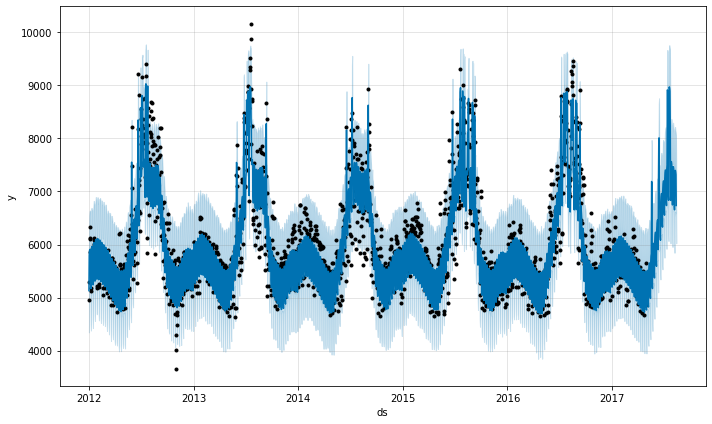

In [41]:
fig1 = m.plot(forecast)

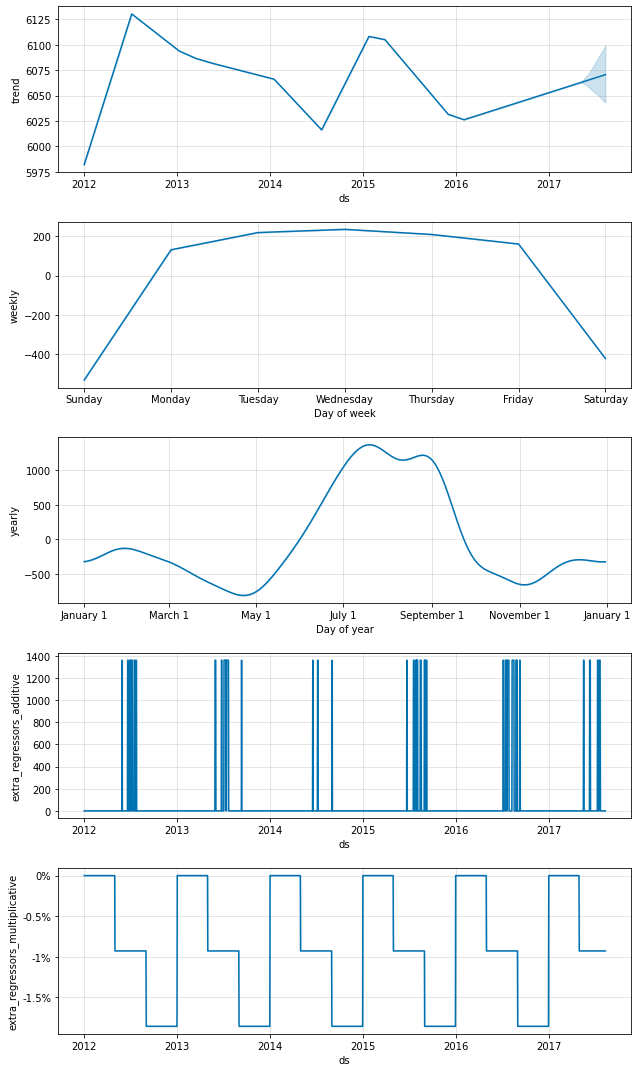

In [42]:
fig2 = m.plot_components(forecast)

In [43]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,207091.351050,455.072907,356.656966,0.063278,0.051366,0.901099
1,37 days 00:00:00,213175.140345,461.708935,363.589373,0.064444,0.053034,0.890110
2,37 days 12:00:00,214543.920550,463.188861,365.992292,0.064850,0.054296,0.890110
3,38 days 00:00:00,218546.723911,467.489812,369.840365,0.065223,0.054497,0.884615
4,38 days 12:00:00,220907.695673,470.008187,373.776087,0.065846,0.054716,0.884615
...,...,...,...,...,...,...,...
653,363 days 00:00:00,163520.569582,404.376767,343.378295,0.062870,0.062709,0.978022
654,363 days 12:00:00,164383.649077,405.442535,343.391670,0.062873,0.062709,0.978022
655,364 days 00:00:00,167372.805641,409.112216,345.915222,0.063548,0.063483,0.972527
656,364 days 12:00:00,167125.921852,408.810374,344.978922,0.063401,0.062869,0.972527


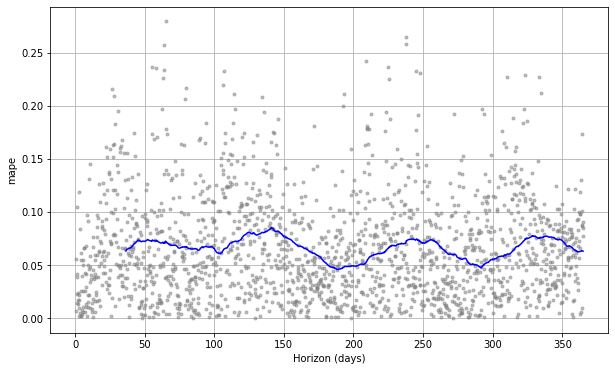

In [44]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')
